# Iris Dataset Modelling 

In [38]:
import numpy as np #For ndarrays
import pandas as pd
import matplotlib.pyplot as plt #For plotting of histogram graphs
import seaborn as sns #For plotting violin graphs
from sklearn.linear_model import LogisticRegression #For performing logistic Regression on the dataset
from sklearn.model_selection import train_test_split #For splitting dataset for training a model
from sklearn.preprocessing import StandardScaler # For scaling the data
from sklearn.model_selection import cross_val_score # For scoring
from sklearn.neighbors import KNeighborsClassifier # For applying KNN classification algorithm
from sklearn.ensemble import RandomForestClassifier # For applying Random Forest algorithm
%matplotlib inline

In [113]:
data = pd.read_csv(r"C:\Users\TEMP.DESKTOP-C9PA4KD.000.001.002.003\Desktop\iris-data-master\data\Iris.csv")

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [115]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [116]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [110]:
#data.columns = ['Index','Sepal Length','Sepal Width','Petal Length','Petal Width','Species']

In [117]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [118]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [119]:
data1=data.copy()

In [120]:
data.drop(columns='Id',inplace=True)

In [121]:
data.shape

(150, 5)

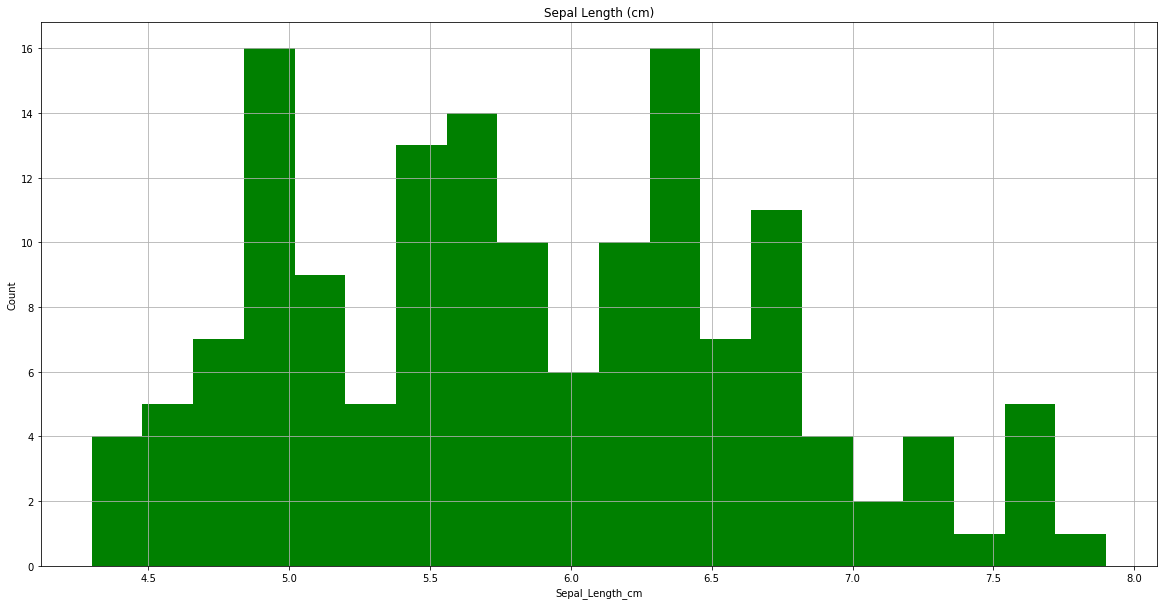

In [123]:
 plt.figure(figsize = (20,10)) 
x = data["SepalLengthCm"] 
plt.hist(x, bins=20,color = "green") 
plt.title("Sepal Length (cm)") 
plt.xlabel("Sepal_Length_cm") 
plt.ylabel("Count") 

plt.grid()
plt.show()

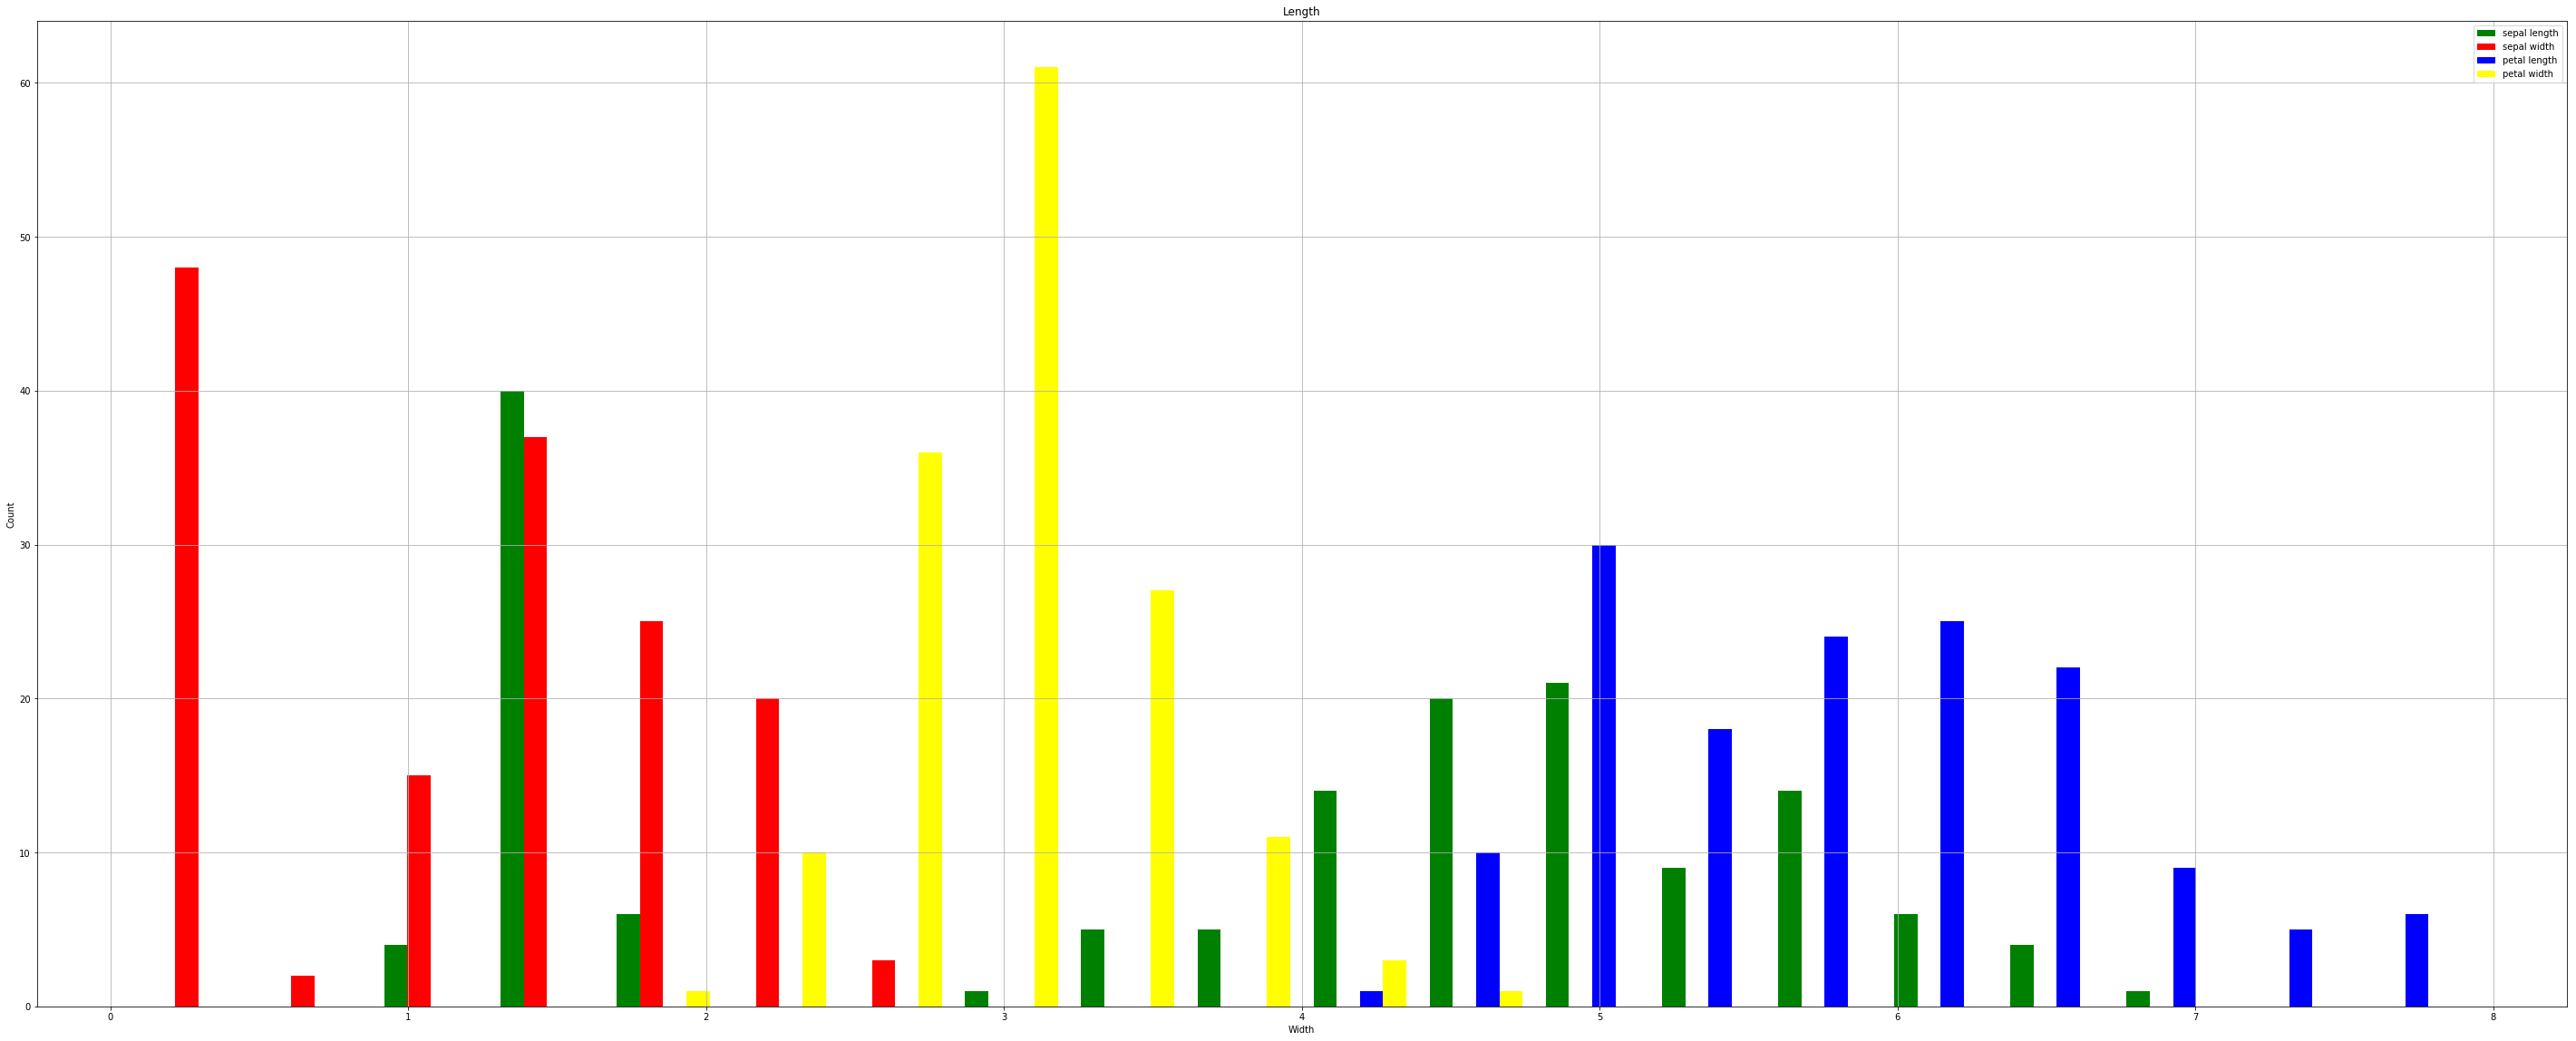

In [125]:
plt.figure(figsize = (50, 20)) 
x = data['PetalLengthCm'] 
y = data['PetalWidthCm']
z = data['SepalLengthCm']
a = data['SepalWidthCm']

colors=['green','red','blue','yellow']
plt.hist([x,y,z,a],bins = 20 , color=colors,label = ['sepal length','sepal width', 'petal length', 'petal width'])

#Providing legend to identify the column name on basis of their color
plt.legend(loc='upper right')
plt.title("Length") 
plt.xlabel("Width") 
plt.ylabel("Count") 
plt.grid()


In [126]:
x=data.iloc[:,0:4]

In [127]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [128]:
y=data.iloc[:,-1]

In [129]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 
#test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape, X_test.shape))

There are (105, 4) samples in the training set and (45, 4) samples in the test set


In [133]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std

array([[-1.02366372, -2.37846268, -0.18295039, -0.29145882],
       [ 0.69517462, -0.10190314,  0.93066067,  0.73721938],
       [ 0.92435306,  0.58106472,  1.04202177,  1.6373128 ],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35146505],
       [ 0.92435306, -1.24018291,  1.09770233,  0.73721938],
       [-0.33612839, -1.24018291,  0.03977182, -0.16287405],
       [ 2.07024529, -0.10190314,  1.26474398,  1.38014325],
       [ 0.46599617,  0.58106472,  0.48521625,  0.48004983],
       [-0.45071761, -1.46783886, -0.01590873, -0.16287405],
       [ 0.46599617, -0.784871  ,  0.59657735,  0.73721938],
       [ 0.46599617, -0.55721505,  0.70793846,  0.35146505],
       [-1.13825295, -1.24018291,  0.37385514,  0.6086346 ],
       [ 0.46599617, -1.24018291,  0.6522579 ,  0.86580415],
       [ 1.26812073,  0.35340877,  0.48521625,  0.22288028],
       [ 0.69517462, -0.10190314,  0.76361901,  0.99438893],
       [ 0.1222285 ,  0.80872067,  0.37385514,  0.48004983],
       [-1.25284217,  0.

In [135]:
knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('The accuracy of the Knn classifier on training data is {:.2f}'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knn.score(X_test_std, y_test)))

The accuracy of the Knn classifier on training data is 0.97
The accuracy of the Knn classifier on test data is 0.98


In [143]:
knn.predict([[5.9,3.0,5.1,1.8]])

array(['Iris-virginica'], dtype=object)

In [145]:
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train_std, y_train)

#Print performance
print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(random_forest.score(X_train_std, y_train)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(random_forest.score(X_test_std, y_test)))

The accuracy of the Random Forest classifier on training data is 0.99
The accuracy of the Random Forest classifier on test data is 0.98


In [146]:
random_forest.predict([[5.9,3.0,5.1,1.8]])

array(['Iris-virginica'], dtype=object)